In [3]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from tqdm import tqdm

In [5]:
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

In [36]:
def MatrixError_(img1, img2):
    # img1 -- predicted data
    # img2 -- true data

    cnt_m = np.zeros((101, 2, 2), dtype=int)
    for i in tqdm(range(img1.shape[0])):
        for j in range(img1.shape[1]):
            for k in range(img1.shape[2]):
                threshold = int(100*img1[i][j][k])
                if img2[i][j][k] == 0:
                    cnt_m[threshold:, 1, 1] += 1  # TN
                    cnt_m[:threshold, 0, 1] += 1  # FP
                if img2[i][j][k] == 1:
                    cnt_m[threshold:, 1, 0] += 1  # FN
                    cnt_m[:threshold, 0, 0] += 1  # TP

                # if img1[i][j][k] == 1 and img2[i][j][k] == 1: # TP
                #     cnt_m[0][0] = cnt_m[0][0] + 1
                # if img1[i][j][k] == 1 and img2[i][j][k] == 0: # FP
                #     cnt_m[0][1] = cnt_m[0][1] + 1
                # if img1[i][j][k] == 0 and img2[i][j][k] == 1: # FN
                #     cnt_m[1][0] = cnt_m[1][0] + 1
                # if img1[i][j][k] == 0 and img2[i][j][k] == 0: # TN
                #     cnt_m[1][1] = cnt_m[1][1] + 1
    return cnt_m

In [37]:
def MatrixError(img1, img2):
    # img1 -- predicted data
    # img2 -- true data
    img2 = (img2*1).astype(bool)
    cnt_m = np.zeros((101, 2, 2), dtype=int)
    
    for idx, T in enumerate(np.linspace(0, 1, 101)):
        TP_count = ((img1>=T)*img2).sum()
        TN_count = ((img1<=T)*~img2).sum()

        FP_count = ((img1>=T)*~img2).sum()
        FN_count = ((img1<=T)*img2).sum()
        
        cnt_m[idx, 1, 1] = FN_count
        cnt_m[idx, 0, 1] = FP_count
        cnt_m[idx, 1, 0] = FN_count
        cnt_m[idx, 0, 0] = TP_count
    return cnt_m

In [48]:
gt = np.array([[[1, 0, 1, 0, 1]]]).astype(bool)
a = np.array([[[0.75, 0.1, 0.95, 0.05, 1]]])

In [49]:
out1 = MatrixError(a, gt)
out2 = MatrixError_(a, gt)


100%|██████████████████████████████████████████| 1/1 [00:00<00:00, 15420.24it/s]


In [50]:
print((((out1-out2)**2)**0.5).sum())

160.0


In [11]:
def AUC(x, y):
    s = 0
    for i in range(1, x.shape[0]):
        s += (x[i] - x[i-1]) * (y[i] + y[i-1]) / 2
    return s

In [7]:
# Download filter data:
img_filter = nib.load('C:/Users/nicit/OneDrive/Рабочий стол/IXI/IXI131/nn_out_19_09_2023_09_30.nii.gz')
img_filter = img_filter.get_fdata()
print(img_filter.shape)

# Download true data:
img_true = nib.load('C:/Users/nicit/OneDrive/Рабочий стол/Segmentation/Result/131/nn_out_19_09_2023_09_30_Segmentation-Segment_1-label.nii.gz')
img_true = img_true.get_fdata()
print(img_true.shape)

(512, 512, 100)
(512, 512, 100)


In [8]:
tmp_matrix = MatrixError(img_filter, img_true)

100%|██████████| 512/512 [04:36<00:00,  1.85it/s]


In [23]:
ROC = np.array([tmp_matrix[:, 0, 1] / (tmp_matrix[:, 1, 1] + tmp_matrix[:, 0, 1]), tmp_matrix[:, 0, 0] / (tmp_matrix[:, 0, 0] + tmp_matrix[:, 1, 0])])

In [26]:
ROC = np.hstack((np.array([[1], [1]]), ROC))

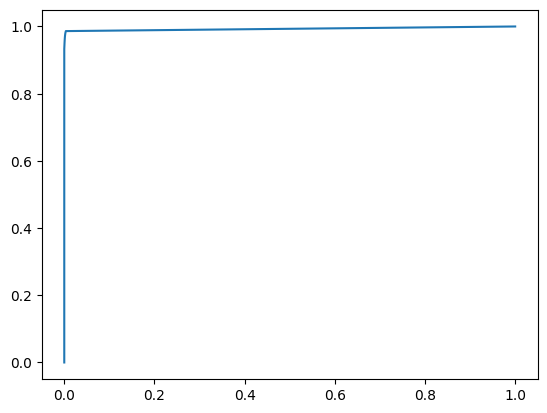

In [31]:
plt.plot(ROC[0, :], ROC[1, :])

In [32]:
AUC(ROC[0, ::-1], ROC[1, ::-1])

0.9930450692217901